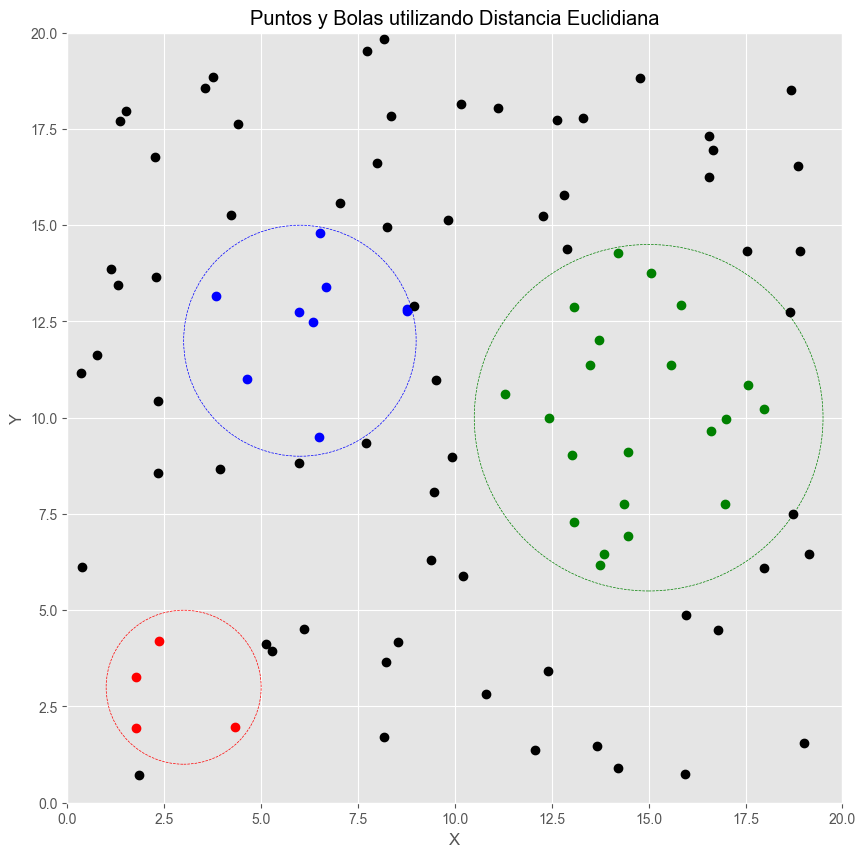

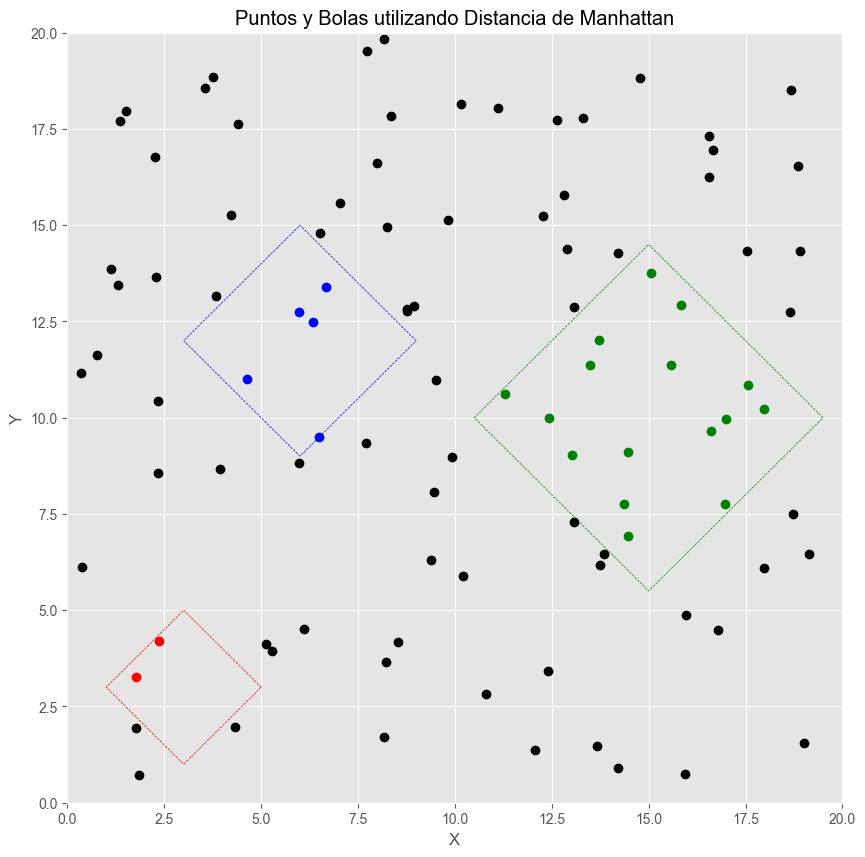

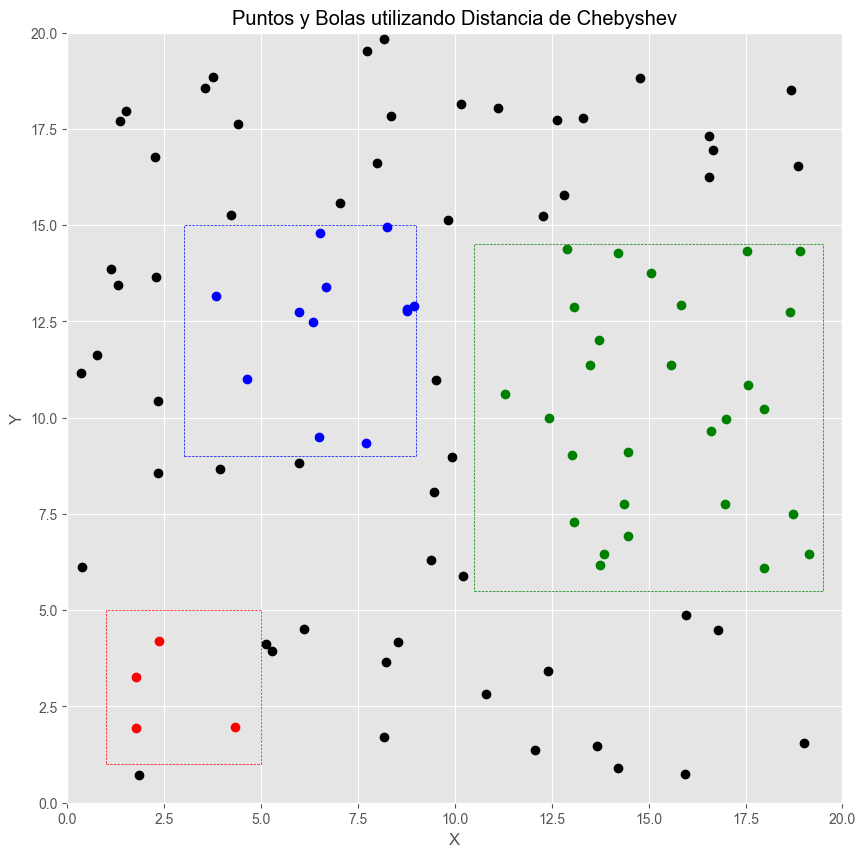

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle, Circle

class EspacioMetrico:
    def __init__(self, num_puntos=100, dimension=2, rango=(0, 20)):
        self.puntos = np.random.rand(num_puntos, dimension) * (rango[1] - rango[0]) + rango[0]
        self.centros = [[3, 3], [15, 10], [6, 12]]
        self.radios = [2, 4.5, 3]

    @staticmethod
    def distancia_euclidiana(punto1, punto2):
        return np.sqrt(np.sum((punto1 - punto2) ** 2))

    @staticmethod
    def distancia_manhattan(punto1, punto2):
        return np.sum(np.abs(punto1 - punto2))

    @staticmethod
    def distancia_chebyshev(punto1, punto2):
        return np.max(np.abs(punto1 - punto2))

    @staticmethod
    def distancia_minkowski(punto1, punto2, p):
        return (np.sum(np.abs(punto1 - punto2) ** p)) ** (1/p)

    def graficar_puntos_por_distancia(self, distancia_func, p=None, titulo='Distancia'):
        plt.figure(figsize=(10, 10))
        colores = ['r', 'g', 'b']

        for i, (centro, radio) in enumerate(zip(self.centros, self.radios)):
            centro_np = np.array(centro)
            forma = None
            if distancia_func == self.distancia_manhattan:
                vertices = [centro_np + np.array([radio, 0]), centro_np + np.array([0, radio]),
                            centro_np - np.array([radio, 0]), centro_np - np.array([0, radio])]
                forma = Polygon(vertices, fill=False, edgecolor=colores[i], linestyle='--')
            elif distancia_func == self.distancia_chebyshev:
                forma = Rectangle(centro_np - radio, 2 * radio, 2 * radio, fill=False, edgecolor=colores[i], linestyle='--')
            else:
                forma = Circle(centro_np, radio, fill=False, edgecolor=colores[i], linestyle='--')
            plt.gca().add_patch(forma)

        for punto in self.puntos:
            color_punto = 'k'
            for i, (centro, radio) in enumerate(zip(self.centros, self.radios)):
                centro_np = np.array(centro)
                if p is not None:
                    distancia = distancia_func(centro_np, punto, p)
                else:
                    distancia = distancia_func(centro_np, punto)
                if distancia < radio:
                    color_punto = colores[i]
                    break
            plt.plot(punto[0], punto[1], marker='o', color=color_punto, linestyle='None')

        plt.xlim(0, 20)
        plt.ylim(0, 20)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Puntos y Bolas utilizando {titulo}')
        plt.show()

    def ejecutar(self):
        self.graficar_puntos_por_distancia(self.distancia_euclidiana, titulo='Distancia Euclidiana')
        self.graficar_puntos_por_distancia(self.distancia_manhattan, titulo='Distancia de Manhattan')
        self.graficar_puntos_por_distancia(self.distancia_chebyshev, titulo='Distancia de Chebyshev')
        #self.graficar_puntos_por_distancia(self.distancia_minkowski, p=3, titulo='Distancia de Minkowski (p=3)')

# Main execution
if __name__ == "__main__":
    espacio_metrico = EspacioMetrico()
    espacio_metrico.ejecutar()


## Distancia Minkowski

In [2]:
def distancia_minkowski(punto1, punto2, p):
        return (np.sum(np.abs(punto1 - punto2) ** p)) ** (1/p)
    
def inner_point_minkowski(Datos, n, centro, radio):
    dentro = []
    indices = []    
    for i in range(n):
        if distancia_minkowski(Datos[i],centro,0.5) < radio:
            dentro.append(Datos[i])
            indices.append(i)   
    return np.array(dentro)
    
def edge_minkowski(Datos, n, centro, radio):
    dentro = []
    indices = []    
    for i in range(n):
        if abs(distancia_minkowski(Datos[i],centro,0.5)-radio) < .05:
            dentro.append(Datos[i])
            indices.append(i)
    return np.array(dentro)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.clf()

n = 100 # Número de Datos
Datos = np.random.rand(n,2) * 10
bola1 = inner_point_minkowski(Datos, n = 100, centro = [2,3], radio = 2)
bola2 = inner_point_minkowski(Datos, n = 100, centro = [5,7], radio = 2)
bola3 = inner_point_minkowski(Datos, n = 100, centro = [8,3], radio = 2.5)
inner_points = list(bola1) + list(bola2) + list(bola3)
aislados = np.array([list(x) for x in Datos if x not in np.array(inner_points)])

n = 1000000 # Número de Datos
Datos_edge = np.random.rand(n,2) * 15
edge1 = edge_minkowski(Datos_edge, n = 1000000, centro = [2,3], radio = 2)
edge2 = edge_minkowski(Datos_edge, n = 1000000, centro = [5,7], radio = 2)
edge3 = edge_minkowski(Datos_edge, n = 1000000, centro = [8,3], radio = 2.5)

<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

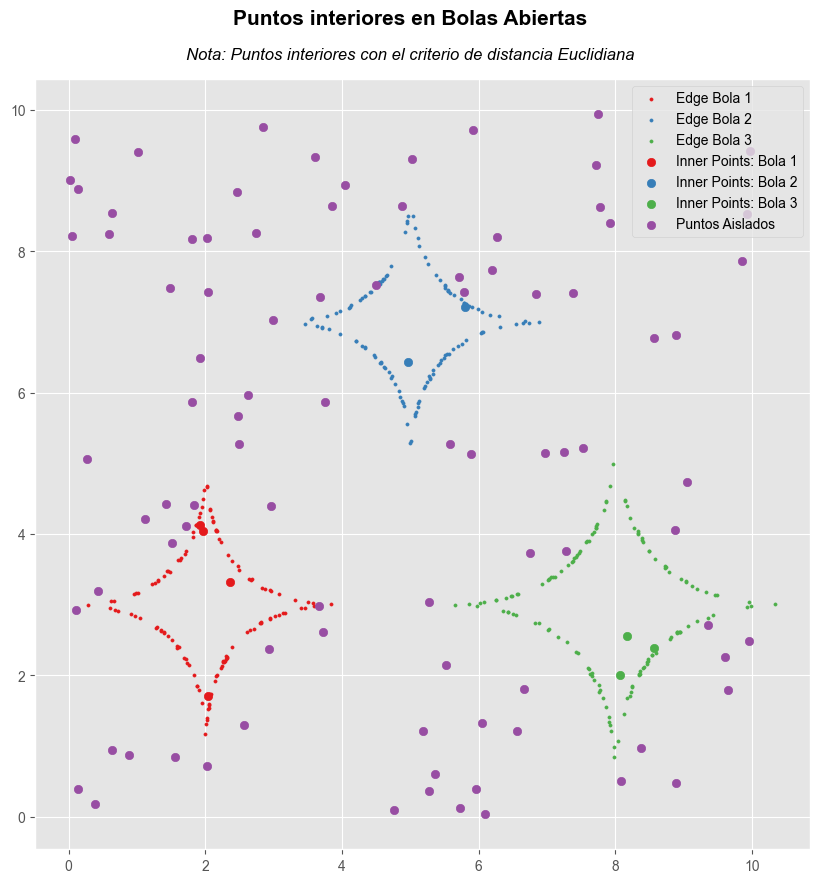

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.style.use('ggplot')  # GGplot la mera cabra
colores = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
plt.figure(figsize=(10, 10))
plt.figure(figsize = (10,10))
plt.scatter(edge1[:,0], edge1[:,1], color = colores[0], label = 'Edge Bola 1', s=5)
plt.scatter(edge2[:,0], edge2[:,1], color = colores[1], label = 'Edge Bola 2', s=5)
plt.scatter(edge3[:,0], edge3[:,1], color = colores[2], label = 'Edge Bola 3', s=5)  
plt.scatter(bola1[:,0], bola1[:,1], color = colores[0], label = 'Inner Points: Bola 1')
plt.scatter(bola2[:,0], bola2[:,1], color = colores[1], label = 'Inner Points: Bola 2')
plt.scatter(bola3[:,0], bola3[:,1], color = colores[2], label = 'Inner Points: Bola 3')
plt.scatter(aislados[:,0], aislados[:,1], color = colores[3], label = 'Puntos Aislados')

plt.legend() # loc='upper right
plt.suptitle(
    'Puntos interiores en Bolas Abiertas',
    color='black',
    fontsize=15,
    #loc='center',
    fontweight='bold',
    style='normal',
    family='Arial',
    y=0.950)

nota = '''Nota: Puntos interiores con el criterio de distancia Euclidiana'''
plt.figtext(0.5, 0.9, nota, ha='center', fontsize=12, style ='italic', family='Arial')
plt.show()